<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_%C3%81rbol_binario_de_busqueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema Árbol binario de busqueda óptimo.

Este problema consiste en reducir la cantidad de nodos visitados en un árbol binario de busqueda asegurando una complejidad en su tiempo de ejecución de $O(log(n))$, para que esto ocurra lo ideal es que los nodos esten bien distribuidos dentro del árbol consiguiendo que este quede equilibrado, además lo ideal para reducir la cantidad de nodos visitados lo mejor sería dejar los nodos con mayor probabilidad de ser buscados cerca de la raíz.

Para resolver este problema haremos uso de programación dinámica con un arreglo como sub-estructura óptima y además del paradigma divide y venceras para luego compararlos y ver cual es mejor.

#2. Árbol binario de busqueda óptimo 

## 2.1. Descripción versión recursiva.

Este algoritmo es una forma para poder resolver este problema el cual proviene del paradigma divide y venceras, aquí iremos dividiendo nuestros problema principal en sub-problemas para facilitarnos la tares.

Lo primero que realiza nuestro algoritmo es sumar todas las frecuencias recibidas dentro de un arreglo y luego va realizando cortes dentro de esta tabla buscando el coste minimo de busqueda dentro de nuestro árbol, esta acción la realiza de la siguiente manera.

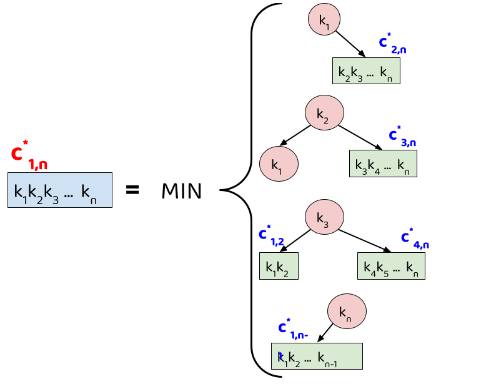

donde $C_{i,n}^*$ representa el coste minimo para el arreglo $[k_1, k_2,..., k_n]$ y el árbol que se encuentra a su derecha representa los cortes que irá realizando nuestro algoritmo en busca del coste minimo.

El problema que tiene este algoritmo es que mientras se va ejecutando realizará calculos repetitivos lo cual provocará mayor tiempo de ejecución para nuestro programa consiguiendo una complejidad temporal exponencial.

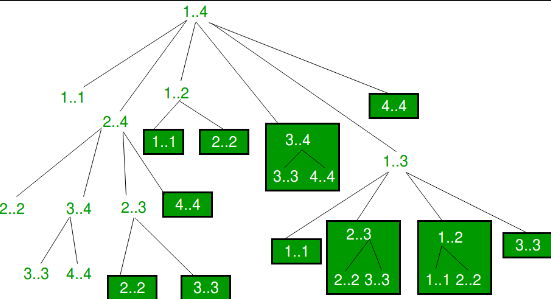

##2.2. Código recursivo.

In [1]:
import random
import numpy as np
import networkx as nx
import math as mt
import pydot
import statistics as st
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
from copy import deepcopy
from timeit import repeat
from termcolor import colored

In [2]:
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)

In [3]:
def buscarMedian(freq):
    auxFreq = freq.copy()
    auxFreq = sorted(freq)
    aux = auxFreq[(len(auxFreq) - 1) // 2]
    for i in range(len(freq)):
        if freq[i] == aux:
            return i, aux
    return -1, aux

In [16]:
def optimal_bst_instance_generator2(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()

    p = list(arr[:n]) # Probabilidad de las claves
    i, aux = buscarMedian(p)
    keys[0], keys[i] = keys[i], keys[0]
    p[0], p[i] = p[i], p[0]
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

In [5]:
def armarArbol(T, keys, freq, q):
    if len(keys) == 1:
        return keys[0]
    if len(freq) == 0:
        clave = q[len(q) - 1]
        q.pop()
        return clave 

    dic = dict()
    i = 0

    for j in freq:
        dic[j] = keys[i]
        i += 1

    i, aux = buscarMedian(freq)

    nodoP = dic[aux]
    nodoD = armarArbol(T, keys[i + 1:], freq[i + 1:], q)
    nodoI = armarArbol(T, keys[:i], freq[:i], q)

    T.add_edge(nodoP, nodoD)
    T.add_edge(nodoP, nodoI)

    return nodoP

In [9]:
def costoOptimo(keys, freq, i, j, verbose= False, cont = 0):
    if verbose:
        print("Función costoOptimo()")
        print("Entrada:")
        print("Keys =", str(keys[i:j +1]))
        print("Frecuencias =", str(freq[i:j + 1]), "\n")

    if j < i:
        if verbose:
            print("Salida = 0\n")
        return 0, cont
    if j == i:
        if verbose:
            print("Salida =", freq[i], "\n")
        return freq[i], cont

    fsum = Sum(freq, i, j)
    if verbose:
        print("Se realiza una suma de todas las frecuancias faltantes")
        print("Suma resultante =", fsum, "\n")
        print("Se inicializa una variable con un número muy grande como Min")
    Min = 999999999999
     
    for r in range(i, j + 1):
        cont += 1
        costAux1, cont = costoOptimo(keys, freq, i, r - 1, verbose, cont)
        cont += 1
        costAux2, cont = costoOptimo(keys, freq, r + 1, j, verbose, cont)
        cost = costAux1 + costAux2

        if verbose:
            print("Se buscan los costos optimos de los posibles sub-arboles")
            print("Por último se suman quedando:", costAux1, "+", costAux2, "=", cost)
            print("luego se compara con el minimo encontrado:")
            print(cost, "<", Min, "\n")
        if cost < Min:
            Min = cost
    
    return Min + fsum, cont

def ArbolDeBusquedaRecursivo(keys, freq, q, n, verbose= False, visualize= False):
    cost, cont = costoOptimo(keys, freq, 0, n - 1, verbose)
    T = nx.DiGraph()

    if visualize:
        armarArbol(T, keys, freq, q)

        pos = graphviz_layout(T , prog="dot")
        nx.draw(T ,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")
    return cost, cont
 
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

##2.3. Descripción versión con programación dinámica.

Aquí nos encontramos con otra forma para poder resolver este problema el cual es una versión optimizada del algoritmo recursivo, esto es gracias a la subestructura optima que utilizaremos la cual viene siendo una matriz que almacenará todos los costos calculados por nuestro algoritmo, de esta manera no será necesario volver a calcularlos como lo realiza la versión recurisva lo que provocará un tiempo de ejecución mucho menor.

Lo primero que realiza es generar una matriz de tamaño $N x N$ donde $N$ viene siendo la cantidad de nodos que tendrá nuestro árbol, luego se inicializa la diagonal principal de la matriz con todos las frecuencias que tiene cada nodo de nuestro árbol y por último se recorre verificando donde se encuentra el menor costo de nuestro recorrido utilizando los datos almacenados en nuestra matriz y por último se retorna el último dato de nuestra primera fila la cual contendrá el coste minimo.



##2.4. Código versión con programación dinamica.

In [10]:
INT_MAX = 2147483647

def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

def arbolDeBusquedaOptimoDinamico(keys, freq, q, n, verbose = False, visualize= False):

    if verbose:
        print("Función arbolDeBusquedaOptimoDinamico()")
        print("Entrada")
        print("Keys =", keys)
        print("Frecuancias =", freq, "\n")
        print("Se inicializa una matriz que almacenará valores calculados")
        print("de tamaño NxN, donde N es la cantidad de Keys \n")

    cost = [[0 for x in range(n)] for y in range(n)]
    cont = 0

    if verbose:
        print("Se inicializa la diagonal principal con las frecuacias")
        print("Obtenidas\n")

    for i in range(n):
        cost[i][i] = freq[i]

    for L in range(2, n + 1):
     
        for i in range(n - L + 1):
             
            j = i + L - 1
            if verbose:
                print("Se calcula la suma de todas las frecuancias")

            off_set_sum = Sum(freq, i, j)

            if i >= n or j >= n:
                break

            if verbose:
                print("Se inicializa la posición i =", i, ", j =", j)
                print("con el valor máximo de la variable\n")
            cost[i][j] = INT_MAX

            if verbose:
                print("Se verifica si los valores calculados previamente")
                print("consiguen un costo mucho más optimo:")
            for r in range(i, j + 1):
                c = 0
                cont += 1
                if (r > i):
                    c += cost[i][r - 1]

                if (r < j):
                    c += cost[r + 1][j]

                c += off_set_sum
                if verbose:
                    print("Costo minimo calculado =", c, "\n")
                    print("Se verifica si es menor a los calculos hechos")
                    print("previamente")
                    print(c, "<", cost[i][j], "\n")

                if (c < cost[i][j]):
                    cost[i][j] = c

    if visualize:
        T = nx.DiGraph()
        armarArbol(T, keys, freq, q)

        pos = graphviz_layout(T , prog="dot")
        nx.draw(T ,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")
    return cost[0][n - 1], cont

#3. Ejecución paso a paso

In [31]:
keys, freq, q = optimal_bst_instance_generator(10)
n = len(keys)
print(freq)
print(keys)

[0.09114997881464021, 0.03845089170810997, 0.0335735169894273, 0.012197403836868924, 0.04322969905005857, 0.05744791636620151, 0.07093844920288649, 0.06133727552984844, 0.0025141066310440646, 0.0641571073001437]
[7, 9, 11, 17, 44, 82, 83, 87, 89, 93]


##3.1. Código recursivo (Verbose = True)

Se han truncado las últimas 5000 líneas del flujo de salida.
Salida = 0

Función costoOptimo()
Entrada:
Keys = [11]
Frecuencias = [0.0335735169894273] 

Salida = 0.0335735169894273 

Se buscan los costos optimos de los posibles sub-arboles
Por último se suman quedando: 0 + 0.0335735169894273 = 0.0335735169894273
luego se compara con el minimo encontrado:
0.0335735169894273 < 999999999999 

Función costoOptimo()
Entrada:
Keys = [9]
Frecuencias = [0.03845089170810997] 

Salida = 0.03845089170810997 

Función costoOptimo()
Entrada:
Keys = []
Frecuencias = [] 

Salida = 0

Se buscan los costos optimos de los posibles sub-arboles
Por último se suman quedando: 0.03845089170810997 + 0 = 0.03845089170810997
luego se compara con el minimo encontrado:
0.03845089170810997 < 0.0335735169894273 

Función costoOptimo()
Entrada:
Keys = []
Frecuencias = [] 

Salida = 0

Se buscan los costos optimos de los posibles sub-arboles
Por último se suman quedando: 0.10559792568696456 + 0 = 0.10559792568696456


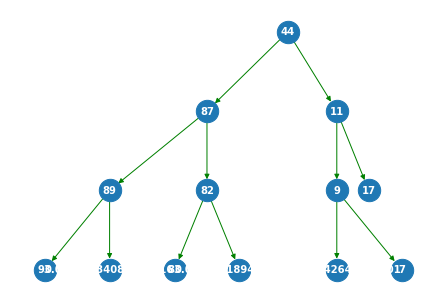

In [33]:
print("Cost of Optimal BST is", ArbolDeBusquedaRecursivo(keys, freq, q.copy(), n, verbose= True, visualize = True))

##3.2. Código Dinámico (Verbose = True)

Función arbolDeBusquedaOptimoDinamico()
Entrada
Keys = [7, 9, 11, 17, 44, 82, 83, 87, 89, 93]
Frecuancias = [0.09114997881464021, 0.03845089170810997, 0.0335735169894273, 0.012197403836868924, 0.04322969905005857, 0.05744791636620151, 0.07093844920288649, 0.06133727552984844, 0.0025141066310440646, 0.0641571073001437] 

Se inicializa una matriz que almacenará valores calculados
de tamaño NxN, donde N es la cantidad de Keys 

Se inicializa la diagonal principal con las frecuacias
Obtenidas

Se calcula la suma de todas las frecuancias
Se inicializa la posición i = 0 , j = 1
con el valor máximo de la variable

Se verifica si los valores calculados previamente
consiguen un costo mucho más optimo:
Costo minimo calculado = 0.16805176223086016 

Se verifica si es menor a los calculos hechos
previamente
0.16805176223086016 < 2147483647 

Costo minimo calculado = 0.2207508493373904 

Se verifica si es menor a los calculos hechos
previamente
0.2207508493373904 < 0.16805176223086016 

Se calcula 

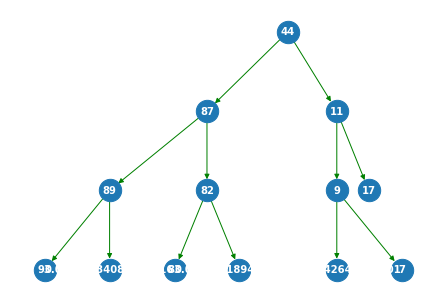

In [32]:
print("Cost of Optimal BST is", arbolDeBusquedaOptimoDinamico(keys, freq, q.copy(), n, verbose= True, visualize= True))

#4. Correctitud del algoritmo árbol de busqueda optimo con bottom-up

### **Teorema (Correctitud).**

## Subestructura óptima

Una subestructura optima explica que mediante el uso de soluciones optimas de subproblemas podemos llegar a la solucion de un mismo problema en toda su totalidad. Habiendo explicado la base se subestructura optima debemos relacionarlo con el problema del arbol con minimo coste,usando subestructura optima consiste que en cada subproblema uno selecciona una clave como nodo raiz y que dada esta debemos obtener el coste minimo, basandonos en el coste minimo de los subproblemas que se forman de ella.

Formula subestructura optima recursivo (Costo optimo)

image.png

## Prueba del Teorema

Vamos a probar la correctitud de la version dinamica. Para esto debemos primeramente resolver el problema original en un algoritmo dinamico es resolver una cantidad de subproblemas previos.

Sea 1 <= i <= j <= n y T sea cualquier BST en i,....j.

Definiendo el costo como:

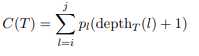

Y el costo de los subproblemas es:

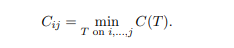

Esto se vincula con la subestructura optima explicada anteriormente y que esta nos permite resolver y guardar los subproblemas para ir combinandolos y llegar al resultado esperado, siendo este el original.

### **Relacion de recurrencia**

Supongamos que la raiz de T en i,.......j es k

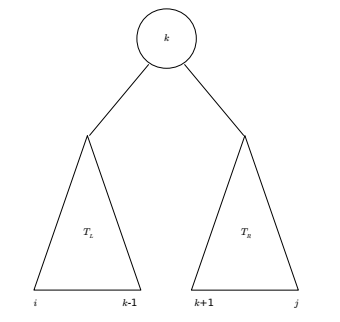

El costo de T es:

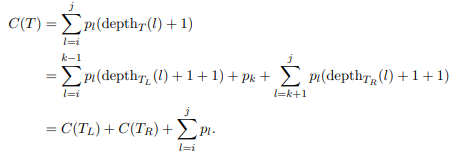

Y entonces podemos definir la siguiente ecuacion de recurrencia.

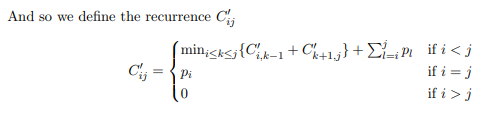

### **El teorema de correctitud**

El algoritmo BST entrega correctamente el costo esperado de una secuencia de claves y sus probabilidades.

### **Prueba del teorema**

Para probar el teorema se utilizara induccion matematica.

### **Caso base:**

Es cuando tenemos un arreglo de tamaño 1 debido a que al ser de este tamaño retorna automaticamente el nodo con el costo optimo que es igual a su frecuencia, por lo tanto se asume el algoritmo funciona.

### **Caso inductivo:**
Para el caso inductivo hay dos casos 

Caso 1: Ci,j ≤ C''i,j previo al calculo C''i,j es el costo de algun BST en i,......j y Ci,j es el costo de un BST optimo.

Caso 2: Ci,j >= C''i,j Supongamos que la raiz de el BST optimo es k entonces.


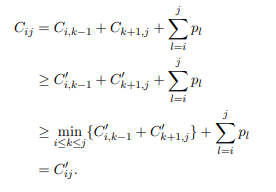

Como podemos observar a traves de la imagenes la ultima ecuacion nos retorna al problema original confirmando nuestra hipotesis y demostracion. Debido a que si Ci,j ≤ C''i,j este es menor aseguramos que es un costo optimo mientras que si es mayor o igual es la raiz del arbol binario optimo tal y como podemos ver en la siguiente imagen.

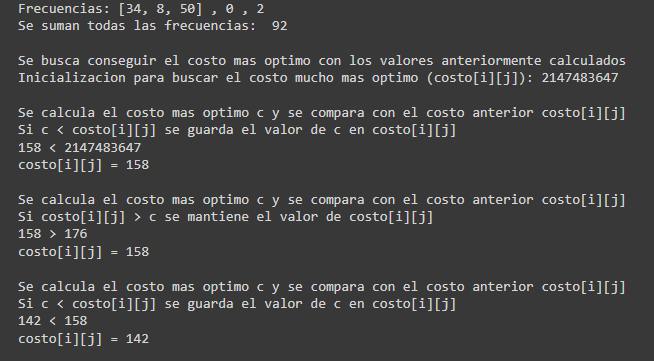

#5. Tiempo de ejecución

### **Variante recursiva**


#### **Teorema**
*El algoritmo **recursive_optimal_bst** tiene un tiempo de ejecución $O(2^n)$.*

#### **Función recursiva**
Se define una función recursiva que modele la división del problema original $T(n)$:
>$T(n) = ∑_{j=0}^{n-1}T(j) + 1$

#### **Método de sustitución**
Ahora, usando el método de sustitución, probaremos que $O(2^n)$ es efectivamente una cota superior asintótica para $T(n)$.

Debemos probar que $T(n) \leq c · 2^n$, para algún valor de $c>0$.
Para ello, asumimos que esto es cierto (inducción) y **sustituimos en la recursión**, los valores de $T(n)$ por $c · 2^n$:

>$T(n) \leq ∑_{j=0}^{n-1}c · 2^j + 1 \leq c · 2^n$
>
>$T(n) \leq c · (2^n-1) + 1 \leq c · 2^n$
>
>$T(n) \leq c · 2^n - c + 1 \leq c · 2^n$
>
>$-c \leq -1$
>
>$c ≥ 1$ 

Por lo que efectivamente $c⋅2^n=O(2^n)$ es una cota asintótica superior para el algoritmo.

### **Variante que aplica Bottom-up**

#### **Teorema**
*El algoritmo **optimal_bst** tiene un tiempo de ejecución $O(n^3)$.*

Para calcular el tiempo de ejecución del algoritmo se utilizará la siguiente fórmula obtenida del libro Algorithms Illuminated (Parte 4, página 107):

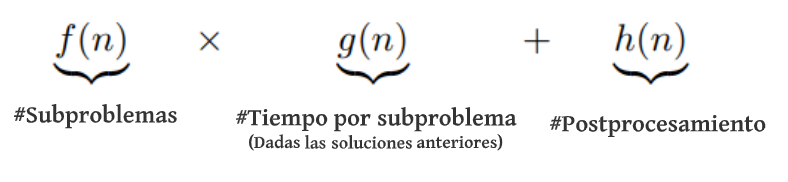

Entonces para obtener el tiempo de ejecución del algoritmo $T(n)$, primeramente debemos calcular las 3 funciones anteriores:

1.   $f(n)$: Se refiere a la cantidad de subproblemas en resolver. Para cada tamaño de intervalo posible, resulta en una cantidad de $n$ tamaño de intervalos(Sin considerar cuando no existen nodos), se calculan las combinatorias para escoger nodos con ese tamaño de intervalo (con $i$ menor o igual a $j$ siempre), que en máxima medida podrá ser.

2.   $g(n)$: Se refiere al tiempo estimado por resolver cada subproblema, este varía en función del tamaño del intervalo del subproblema actual a resolver. Se calcula como los distintos costos generables con una cierta combinación de nodos. Ejemplo, para 2 nodos $k_3$ y $k_4$, puede existir un costo que es dejando al $k_3$ como raiz y otro dejando a $k_4$ como raiz.

3.   $h(n)$: Se refiere al tiempo de ejecución en procesar la solución. En este caso es despreciable el valor de esta función, ya que buscamos una cota superior para el algoritmo y lo calculado es de orden $O(1)$ en instrucciones para almacenar la solución dinámicamente.

Reemplazando obtendremos:
>$T(n) = \sum_{l=1}^{n}\sum_{i=1}^{l}\sum_{r=1}^{i}·c$
>
>$T(n) = c·\sum_{l=1}^{n}\sum_{i=1}^{l} i$
>
>$T(n) = c·\sum_{l=1}^{n}\frac{l^2+l}{2}$
>
>$T(n) = c·(\sum_{l=1}^{n}l^2 + \sum_{l=1}^{n}l)·\frac{1}{2}$
>
>$T(n) = c·(\frac{n(n+1)(2n+1)}{6} + \frac{n(n+1)}{2})·\frac{1}{2}$
>
>$T(n) = c·(\frac{2n^3+3n^2+n}{6}+\frac{n^2+n}{2})·\frac{1}{2}$
>
>$T(n) = O(n^3)$





#### **Complejidad espacial**
*El algoritmo **optimal_bst** tiene una complejidad espacial $O(n^2)$.*

Se obtiene el orden $O(n^2)$ en base a la cantidad de subproblemas anteriores utilizados para resolver el subproblema actual. Se necesita de la creación de 3 matrices para dar con el resultado del costo esperado para el árbol óptimo, las tres matrices son de orden $O(n^2)$ a esto se debe su complejidad espacial$.

Estas son las 3 matrices:

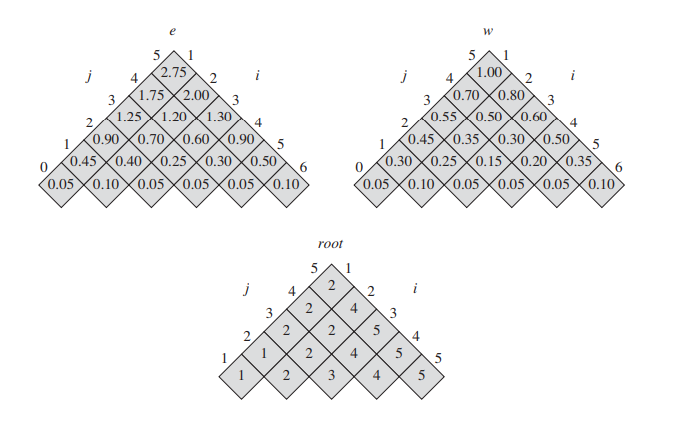

#6. Experimentos

##6.1. Algoritmo recursivo vs dinámico



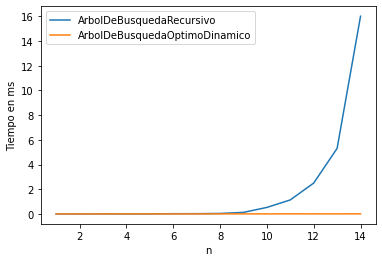

In [12]:
x=[]
y_Dynamic = []
y_NoDynamic = []

for n in range(1,15):
  keys, freq, q = optimal_bst_instance_generator(n)
  
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import arbolDeBusquedaOptimoDinamico", stmt=f"arbolDeBusquedaOptimoDinamico({keys},{freq},{q.copy()},{len(keys)})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces corteDeVarillaRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t_NoDynamic = repeat(setup="from __main__ import ArbolDeBusquedaRecursivo", stmt=f"ArbolDeBusquedaRecursivo({keys},{freq},{q.copy()},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_NoDynamic.append(t_NoDynamic)

plt.plot(x,y_NoDynamic)
plt.plot(x,y_Dynamic)
plt.legend(["ArbolDeBusquedaRecursivo","ArbolDeBusquedaOptimoDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar, el algoritmo con programación dinámica toma bastante ventaja en comparación al recursivo ya que este último debe realizar varios calculos repetitivos los cuales no realiza en el algoritmo dinámico provocando una baja bastante grande en la cantidad de calculos realizados. También en el gráfico anterior se puede aprecia claramente la complejidad del algoritmo recursivo la cual es de $O(2^n)$, en cambio la complejidad en programación dinámica es de $O(n^3)$ la cual no se logra apreciar muy bien por como creece en comparación a la otra función.

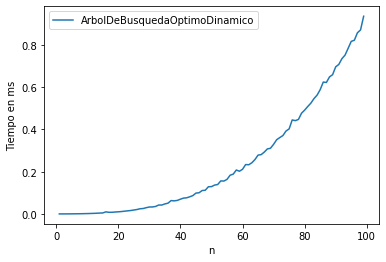

In [50]:
x=[]
y_Dynamic = []

for n in range(1,100):
  keys, freq, q = optimal_bst_instance_generator(n)
  
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import arbolDeBusquedaOptimoDinamico", stmt=f"arbolDeBusquedaOptimoDinamico({keys},{freq},{q},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)

plt.plot(x,y_Dynamic)
plt.legend(["ArbolDeBusquedaOptimoDinamico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar en el grafico anterior el algoritmo dinámico realmente toma la forma de su complejidad la cual fue dicha en el gráfico anterior. 

##6.2. Calculo con la raíz al inicio

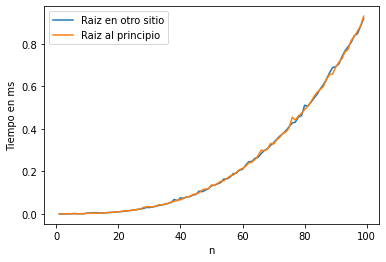

In [19]:
x=[]
y_Dynamic = []
y_Dynamic2 = []

for n in range(1,100):
  keys, freq, q = optimal_bst_instance_generator(n)
  keys2 = keys.copy()
  freq2 = freq.copy()
  q2 = q.copy()
  
  t_Dynamic = repeat(setup="from __main__ import arbolDeBusquedaOptimoDinamico", stmt=f"arbolDeBusquedaOptimoDinamico({keys},{freq},{q},{len(keys)})", repeat=1, number=10)
  t_Dynamic2 = repeat(setup="from __main__ import arbolDeBusquedaOptimoDinamico", stmt=f"arbolDeBusquedaOptimoDinamico({keys2},{freq2},{q2},{len(keys2)})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_Dynamic2.append(t_Dynamic2)

plt.plot(x,y_Dynamic)
plt.plot(x,y_Dynamic2)
plt.legend(["Raiz en otro sitio", "Raiz al principio"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar en el grafico anterior, el hecho de que la raiz se encuentre al principio de nuestro arreglo no afecta en los calculos realizados por nuestro programa, esto ocurre ya que si o si el código recorrá los arreglo realizando todos los calculos posibles y verificando donde se encuentra el menor costo.
